In [4]:
# importing all the packages we will use in this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# loading the dataset and printin first five values
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking for number of null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# populating null values for the Age feature to avg of all the age values
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


<Figure size 432x288 with 0 Axes>

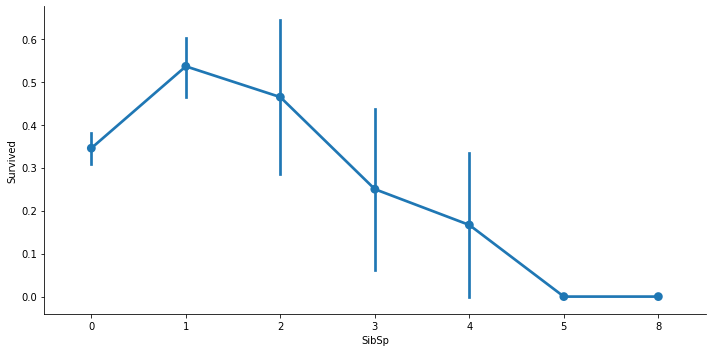

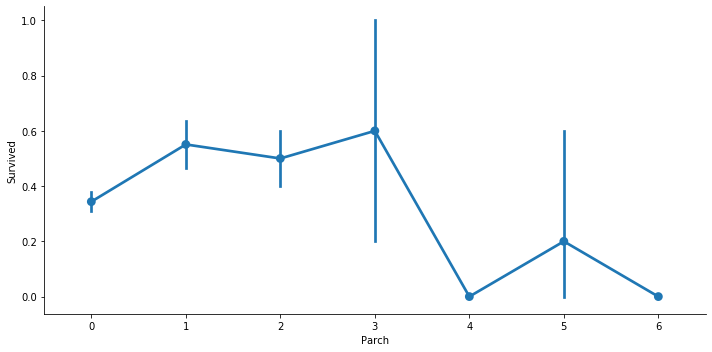

In [7]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [8]:
# adding both the columns in one
titanic['Family_cnt'] = titanic['SibSp'] +titanic['Parch']

In [9]:
# deleting unnecessary columns
titanic.drop(['PassengerId','SibSp','Parch'], axis=1 , inplace= True)

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [11]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [12]:
# to see if people survived if cabin was missing
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [13]:
# where statement acts as a if statement
titanic['Cabin_Ind']=np.where(titanic['Cabin'].isnull(),0,1)

In [14]:
# Mapping sex feature to numbers for better processing
gender_num={'male':0,'female':1}
titanic['Sex']= titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_Ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [15]:
#dropping unnecessary variables
titanic.drop(['Cabin','Embarked','Name','Ticket'], axis =1 , inplace= True)

In [16]:
# writing the cleaned dataset to a new csv file
# index false indicates to the to_csv method not to add index as a new column
titanic.to_csv('titanic_cleaned.csv', index= False)

In [17]:
# dividing the dataset
from sklearn.model_selection import train_test_split
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
# for loop to check if the data is divided correctly.
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [19]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
# storing all the feature, validation and testing data
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [20]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()
#C hyperparamter is regularization parameter to avoid overfitting

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
import joblib
from sklearn.model_selection import GridSearchCV
tr_features = pd.read_csv('train_features.csv')
# header = None is used so that pandas will not take the first value of the column as header
tr_labels = pd.read_csv('train_labels.csv', header=None)

In [22]:
# method for printing results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [23]:
# constructing logistic Regression model
lr = LogisticRegression()
parameters = {
    'C': [0.001,0.01,0.1,1,10,100,1000]
}
cv=GridSearchCV(lr,parameters,cv=5)
# ravel() will convert the vector to array
cv.fit(tr_features,tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 1}

0.678 (+/-0.092) for {'C': 0.001}
0.704 (+/-0.099) for {'C': 0.01}
0.796 (+/-0.13) for {'C': 0.1}
0.798 (+/-0.123) for {'C': 1}
0.794 (+/-0.118) for {'C': 10}
0.794 (+/-0.118) for {'C': 100}
0.794 (+/-0.118) for {'C': 1000}


In [24]:
# storing the best result 
joblib.dump(cv.best_estimator_,'LR_model.pkl')

['LR_model.pkl']

In [25]:
from sklearn.svm import SVC
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
# constructing Support vector machine model
svc = SVC()
parameter ={
    'kernel':['linear', 'rbf'],
    'C':[0.1,1,10]
}
cv = GridSearchCV(svc,parameter, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.116) for {'C': 0.1, 'kernel': 'linear'}
0.624 (+/-0.005) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.116) for {'C': 1, 'kernel': 'linear'}
0.667 (+/-0.081) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.116) for {'C': 10, 'kernel': 'linear'}
0.691 (+/-0.073) for {'C': 10, 'kernel': 'rbf'}


In [27]:
joblib.dump(cv.best_estimator_,'SVM_model.pkl')

['SVM_model.pkl']

In [28]:
# constructing Multi Layer Perceptron model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,),(50,),(100,)],
    'activation': ['relu','tanh','logistic'],
    'learning_rate': ['constant','invscaling','adaptive']
}
cv=GridSearchCV(mlp,parameters,cv=5)
# ravel() will convert the vector to array
cv.fit(tr_features,tr_labels.values.ravel())
print_results(cv)
# getting warining as the model is reaching highest iterations

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.745 (+/-0.085) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.755 (+/-0.071) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.762 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.773 (+/-0.147) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.8 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.779 (+/-0.096) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.8 (+/-0.103) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.803 (+/-0.116) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.805 (+/-0.117) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_

C:\Users\shubh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
joblib.dump(cv.best_estimator_,'MLP_model.pkl')

['MLP_model.pkl']

In [30]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# constructing Random Forest model
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.757 (+/-0.129) for {'max_depth': 2, 'n_estimators': 5}
0.803 (+/-0.124) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.128) for {'max_depth': 2, 'n_estimators': 250}
0.801 (+/-0.14) for {'max_depth': 4, 'n_estimators': 5}
0.828 (+/-0.122) for {'max_depth': 4, 'n_estimators': 50}
0.828 (+/-0.123) for {'max_depth': 4, 'n_estimators': 250}
0.809 (+/-0.065) for {'max_depth': 8, 'n_estimators': 5}
0.82 (+/-0.074) for {'max_depth': 8, 'n_estimators': 50}
0.815 (+/-0.077) for {'max_depth': 8, 'n_estimators': 250}
0.794 (+/-0.062) for {'max_depth': 16, 'n_estimators': 5}
0.813 (+/-0.025) for {'max_depth': 16, 'n_estimators': 50}
0.813 (+/-0.026) for {'max_depth': 16, 'n_estimators': 250}
0.803 (+/-0.063) for {'max_depth': 32, 'n_estimators': 5}
0.815 (+/-0.032) for {'max_depth': 32, 'n_estimators': 50}
0.811 (+/-0.03) for {'max_depth': 32, 'n_estimators': 250}
0.79 (+/-0.058) for {'max_depth': None, 'n_estimators': 5}
0.807 (+/-0.026) 

In [32]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

In [34]:
# constructing Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.116) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.116) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.118) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.076) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.079) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.82 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.82 (+/-0.039) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.83 (+/-0.044) for {'learning_rate

In [36]:
joblib.dump(cv.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

In [37]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv', header=None)

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv', header=None)

In [38]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))
models

{'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVM': SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'MLP': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='adaptive',
               learning_rate_init=0.001, max_iter=200, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=Tru

In [39]:
# calculation accuracy_score, precision_score, recall_score for all models
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [40]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.77 / Precision: 0.707 / Recall: 0.631 / Latency: 0.0ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 0.0ms
MLP -- Accuracy: 0.77 / Precision: 0.694 / Recall: 0.662 / Latency: 4.0ms
RF -- Accuracy: 0.809 / Precision: 0.816 / Recall: 0.615 / Latency: 8.0ms
GB -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 4.0ms


In [41]:
# Evaluating best model which is 
evaluate_model('Gradient Boosting', models['GB'], te_features, te_labels)

Gradient Boosting -- Accuracy: 0.816 / Precision: 0.852 / Recall: 0.684 / Latency: 4.0ms
